<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Practica_8_An%C3%A1lisis_con_Seaborn__IJGHipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 8. Análisis de un Dataset con Seaborn y Visualización Avanzada**

Trabajar con seaborn para crear visualizaciones más avanzadas utilizando gráficos como el mapa de calor y el diagrama de violín.

1. Cargar y explorar el dataset de "tips" de seaborn.

2. Crear los siguientes gráficos con Seaborn:
* Mapa de Calor (Heatmap)
* Diagrama de Violín
* Gráfico de dispersión (Scatter Plot)
* Gráfico de barras (Bar Plot)

# **1. Cargar y explorar el dataset de "tips" de seaborn**

El dataset de "tips" de seaborn, que contiene información sobre las propinas que dejaron los clientes en un restaurante, junto con detalles sobre el total de la cuenta, el día de la semana, si fue almuerzo o cena, entre otros.

**Cargar conjunto de datos y mostrar la información de las primeras 5 filas**

In [ ]:
import seaborn as sns

df_propinas = sns.load_dataset('tips')
print("Información de las primeras 5 filas del conjunto de datos de 'tips': \n\n", df_propinas.head())

Información de las primeras 5 filas del conjunto de datos de 'tips': 

    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


**Mostrar la información general del conjunto de datos**

In [ ]:
print("Información general del conjunto de datos de 'tips': \n")
print(df_propinas.info())

Información general del conjunto de datos de 'tips': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


**Mostrar las estadísticas descriptivas del conjunto de datos**

In [ ]:
print("Estadísticas descriptivas del conjunto de datos de 'tips': \n\n", df_propinas.describe())

Estadísticas descriptivas del conjunto de datos de 'tips': 

        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


**Verificar la existencia de valores nulos o datos faltantes**

In [ ]:
df_propinas.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


# **2. Crear los siguientes gráficos con Seaborn:**

**Mapa de Calor (Heatmap)**

Crear un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (total_bill, tip, size).

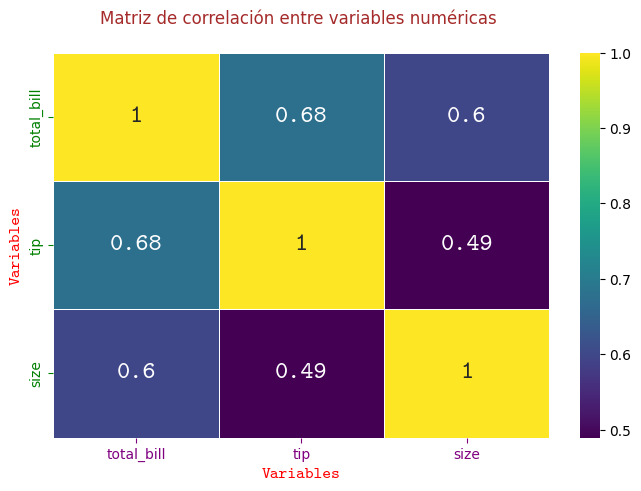

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#print(sorted([f.name for f in fm.fontManager.ttflist]))

correlacion = df_propinas[['total_bill', 'tip', 'size']].corr()   # Calcular la correlación

# Mapa de calor
plt.figure(figsize=(8,5))
sns.heatmap(correlacion, annot=True, cmap='viridis', linewidths=0.5,annot_kws={'fontsize': 18, 'family': 'cmtt10'})
plt.title("Matriz de correlación entre variables numéricas \n", color='brown')
plt.xlabel("Variables", fontsize=12, family='cmtt10', color="red")
plt.ylabel("Variables", fontsize=12, family='cmtt10', color="red")
plt.tick_params(axis='x', colors='purple', labelsize=10)
plt.tick_params(axis='y', colors='green', labelsize=10)

plt.show()

In [ ]:
import matplotlib.font_manager as fm
print(sorted([f.name for f in fm.fontManager.ttflist]))

['DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


**Diagrama de Violín**

Craar un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (day).

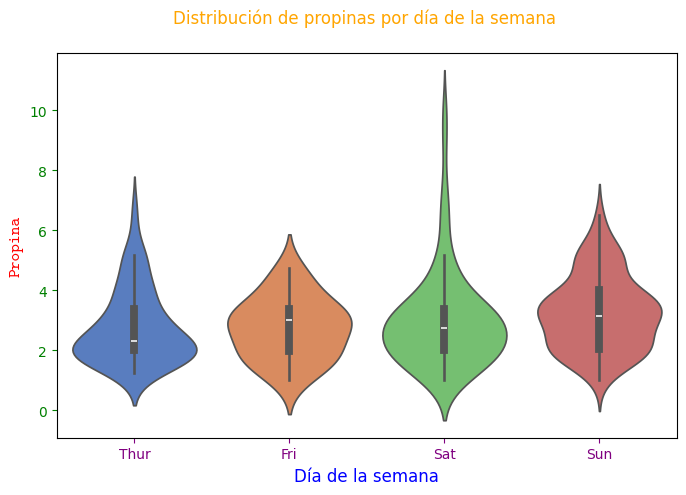

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='day', y='tip', data=df_propinas, palette='muted', hue='day')
plt.title('Distribución de propinas por día de la semana \n', color='orange')
plt.xlabel("Día de la semana", fontsize=12, family='DejaVu Sans', color="blue")
plt.ylabel("Propina", fontsize=12, family='cmtt10', color="red")
plt.tick_params(axis='x', colors='purple', labelsize=10)
plt.tick_params(axis='y', colors='green', labelsize=10)

plt.show()

**Gráfico de dispersión**

Crear un gráfico de dispersión con total_bill en el eje X y tip en el eje Y. Usa un color diferente para cada día de la semana.

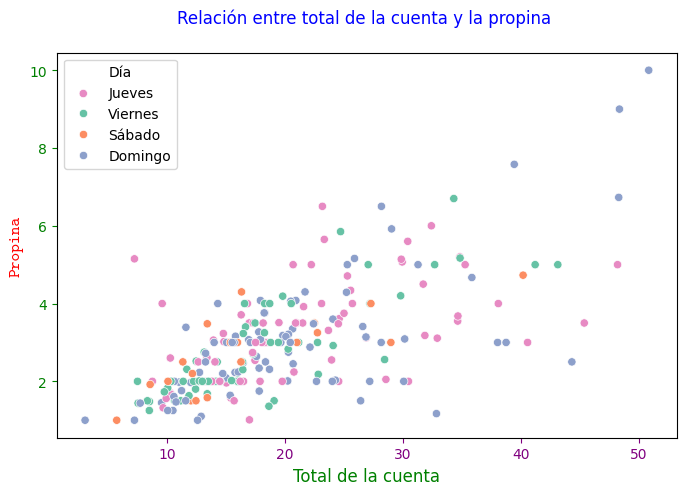

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df_propinas, palette="Set2")
plt.title("Relación entre total de la cuenta y la propina \n", color="blue")
plt.xlabel("Total de la cuenta", fontsize=12, family='DejaVu Sans', color="green")
plt.ylabel("Propina", fontsize=12, family='cmtt10', color="red")
plt.tick_params(axis='x', colors='purple', labelsize=10)
plt.tick_params(axis='y', colors='green', labelsize=10)
plt.legend(title='Día', labels=['Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()


**Gráfico de barras**

Crear un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres)

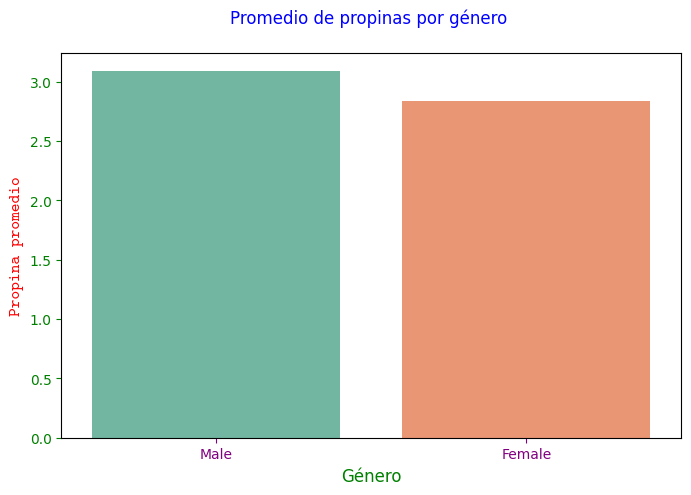

In [ ]:
plt.figure(figsize=(8,5))
colores = {"Male": "skyblue", "Female": "pink"}
sns.barplot(x="sex", y="tip", data=df_propinas, estimator="mean", palette='Set2', errorbar=None, hue="sex")
plt.title("Promedio de propinas por género \n", color="blue")
plt.xlabel("Género", fontsize=12, family='DejaVu Sans', color="green")
plt.ylabel("Propina promedio", fontsize=12, family='cmtt10', color="red")
plt.tick_params(axis='x', colors='purple', labelsize=10)
plt.tick_params(axis='y', colors='green', labelsize=10)
plt.show()